 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [300]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [301]:
# Reading whale returns
csv_whale = Path('../Resources/whale_returns.csv')
whalereturns_df = pd.read_csv(csv_whale, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [302]:
# Count nulls
whalereturns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [303]:
# Drop nulls
whalereturns_df.dropna(inplace=True)
whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [304]:
# Reading algorithmic returns
csv_algo = Path('../Resources/algo_returns.csv')
algoreturns_df = pd.read_csv(csv_algo, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [305]:
# Count nulls
algoreturns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [306]:
# Drop nulls
algoreturns_df.dropna(inplace=True)
algoreturns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [313]:
# Reading S&P TSX 60 Closing Prices
csv_tsx = Path('../Resources/sp_tsx_history.csv')
tsxhistory_df = pd.read_csv(csv_tsx, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [314]:
# Check Data Types
tsxhistory_df.dtypes

Close    object
dtype: object

In [316]:
# Fix Data Types
tsxhistory_df = tsxhistory_df.replace({'\$':'', ',':'', '.':''}, regex=True)
tsxhistory_df = tsxhistory_df.astype(float).copy()
#tsxhistory_df['Close'] = tsxhistory_df['Close'].str.replace('$','', regex=True).str.replace(',','', regex=True).str.replace('.','', regex=True)
#tsxhistory_df = tsxhistory_df.astype(int)

In [321]:
# Calculate Daily Returns
tsx_history_returns = tsxhistory_df.pct_change()

In [322]:
# Drop nulls
tsx_history_returns = tsx_history_returns.dropna().copy()

In [325]:
# Rename `Close` Column to be specific to this portfolio.
tsx_history_returns.columns = ['SP TSX']
tsx_history_returns.head()

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [326]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whalereturns_df, algoreturns_df, tsx_history_returns], axis="columns", join="inner")
all_daily_returns.sort_index(inplace=True)
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

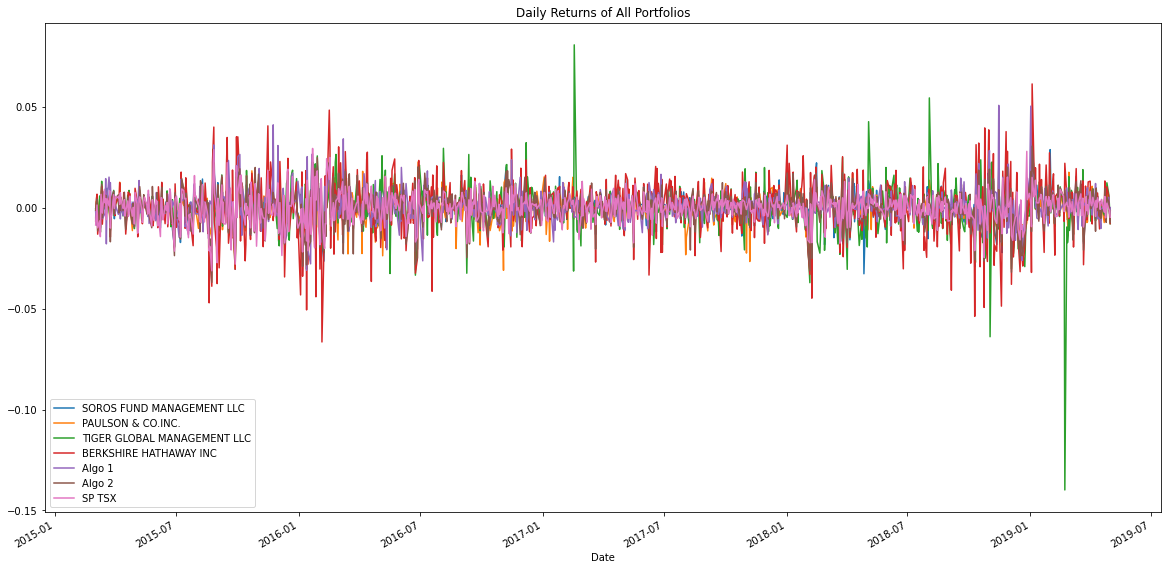

In [328]:
# Plot daily returns of all portfolios
all_daily_returns.plot(figsize=(20,10),title="Daily Returns of All Portfolios")

The above graph depicts clearly what is expected out of the performance for S&P TSX 60 and the other individual portfolios. SP TSX is less volatile and most constant portfolio, it might underperform other portfolios at times, however, overall it's performance is 'safe'. Tiger Global Management LLC is the most volatile one, it will at times outperform SP TSX but also under perform in some periods. Berkshire Hathaway does show a lot of volatility, followed by Algorithm 1; both these portfolios seems to out perform SP TSX at times for brief periods but will underperform often as well.

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

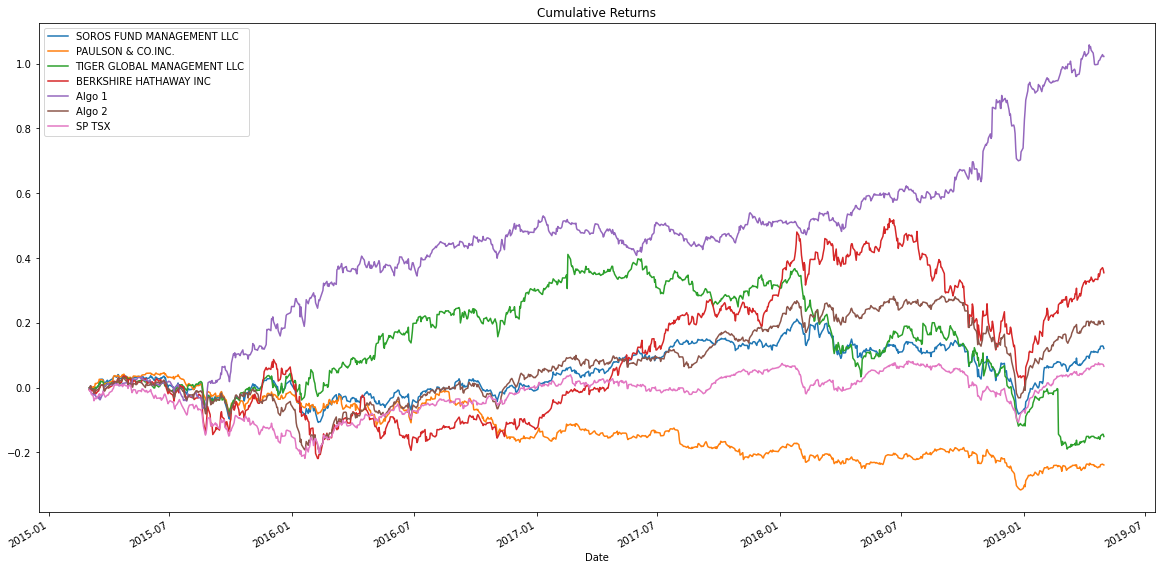

In [329]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

The above graph illustrates the cumulative performances of the individual portfolios during the period 2015-2019. As according to the image and calculation, Algorithm 1 returned the best cumulative return by far. We can clearly note that from 2018 onwards the purple line significantly moved up separating itself from the remainder. Berkshire Hathaway Inc showed the most volatility in regards to its cumulative returns - in the beginning of the period it started low, increasing its performance from 2017 to 2018, however, plumetting in 2019. SP TSX had the most stable and steady results, its performance did not change abruptly at any time throughout the period.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

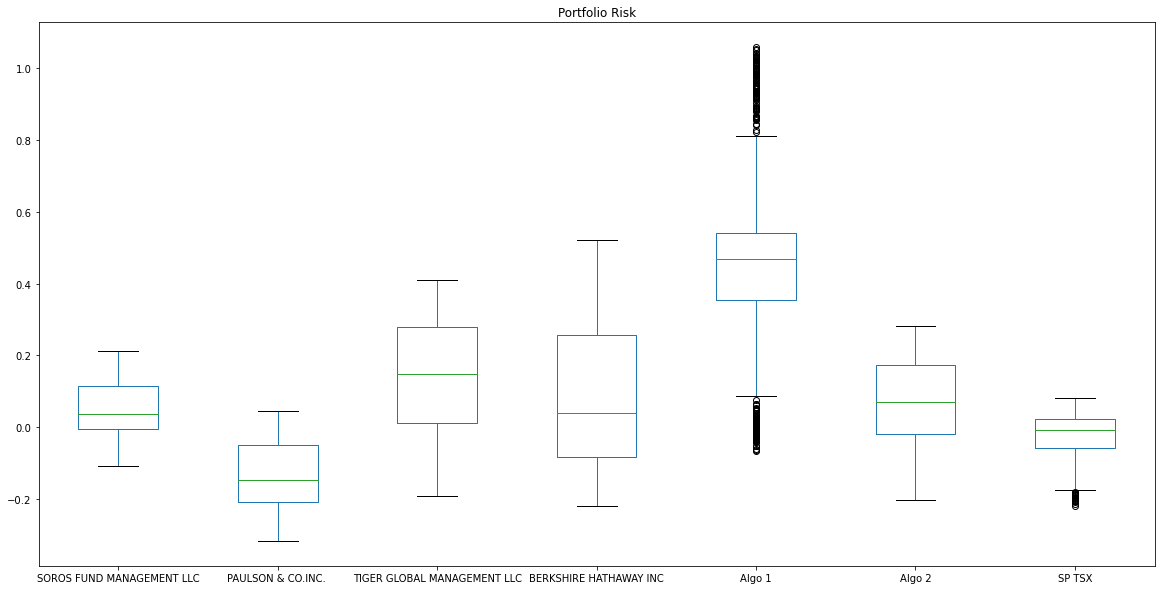

In [330]:
# Box plot to visually show risk
cumulative_returns.plot(kind='box', figsize=(20,10), title="Portfolio Risk")

The largest box in the above graph is for the Berkshire Hathaway Inc. The smallest spread in the above box plot is for the SP TSX. We understand that SP TSX shows the smallest investment risk. Alrorithm 1 shows 'high' risk compared to SP TSX, however, it also shows more outliers.

### Calculate Standard Deviations

In [331]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_std = pd.DataFrame(all_daily_returns.std()).rename(columns ={0:"Standard Deviation"})
all_portfolios_std


,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [332]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = tsxhistory_df.std()

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = all_portfolios_std[all_portfolios_std["Standard Deviation"] > all_portfolios_std.loc["SP TSX", "Standard Deviation"]]
higher_std


,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


The above portfolios shown in the DataFrame have higher standard deviations than, and are therefore riskier than, the S&P 500. This means that considering the group as a whole, these single portolios spread out the most from the group. 

### Calculate the Annualized Standard Deviation

In [333]:
# Calculate the annualized standard deviation (252 trading days)
all_annual = pd.DataFrame(all_daily_returns.std() * np.sqrt(252))
all_annual.columns = ['Annualized Standard Deviation']
all_annual

,Annualized Standard Deviation
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP TSX,0.111664


On the calculation for annualized standard deviation, we can see that BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGERMENT LLC, still show up as the highest standard deviations.  

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}, xlabel='Date'>

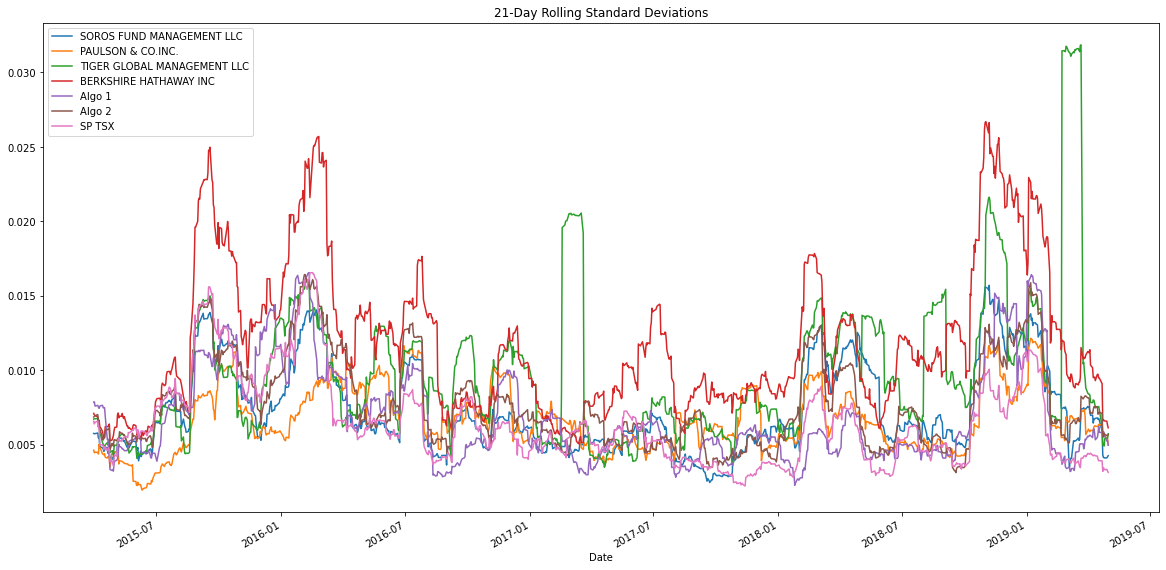

In [334]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_21d = all_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_rolling_21d.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")

In general, as per shown on graph, portfolios tend to see increase in risk at the same time the SP TSX line changes. On this know, there are some portfolios that setthemselves apart of the group, indicating greater increase in risk at times: Berkshire Hathaway and Tigers Global Management spike up a lot more than other portfolios, especially compared to SP TSX - which means that the rolling stardard deviations for these portfolios is a lot higher.


### Calculate and plot the correlation

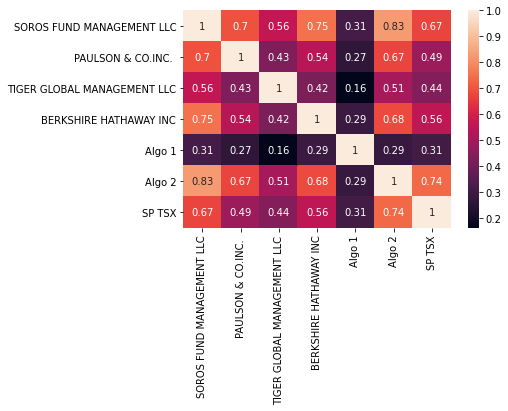

In [281]:
# Calculate the correlation
correlation = all_daily_returns.corr()

# Display de correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True)
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

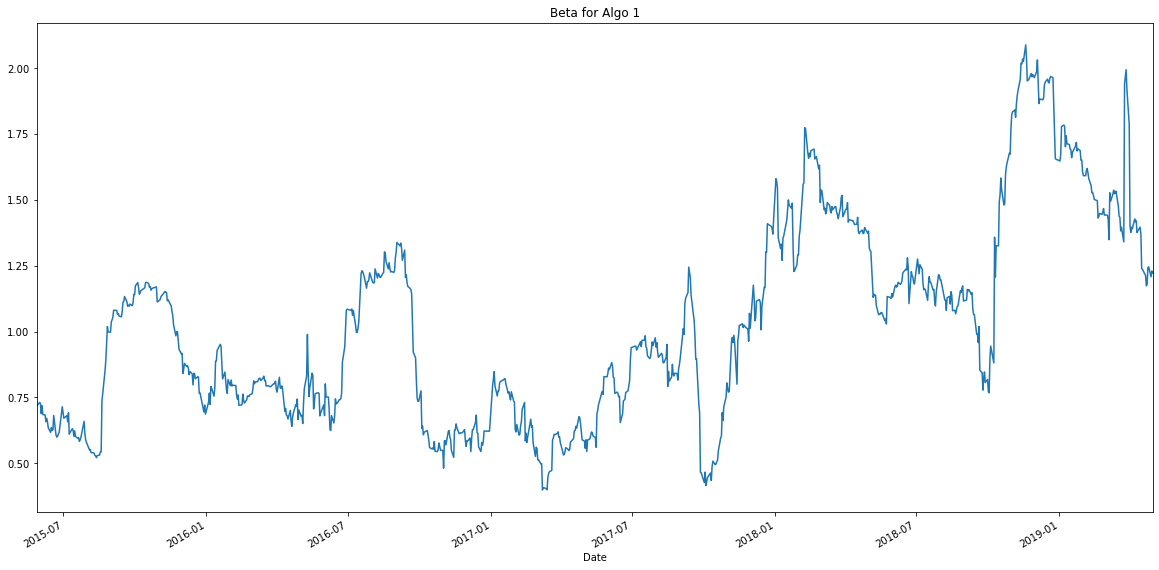

In [285]:
# Calculate covariance of a single portfolio
sfm_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_daily_returns['SP TSX'])

# Calculate variance of S&P TSX
sptsx_variance = all_daily_returns['SP TSX'].rolling(window=60).var()

# Computing beta
sfm_beta = sfm_covariance / sptsx_variance

# Plot beta trend
sfm_beta.plot(figsize=(20,10), title='Beta for Algo 1')
plt.margins(x=0)

The above Rolling Beta plot of Berkshire Hathaway Inc shows the volatility of the portfolio. The graph shows how volatile this portfolio is in comparision to the market: if the line goes above 1, that means the portfolio is more volatile than the market; if it goes below 1, it means it is less volatile than the market. On this note, in general, we can see that Berkshire Hathaway is a lot more volatile than SP TSX, between the periods of 2018-2019, the increase in volatility was the greatest. 


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

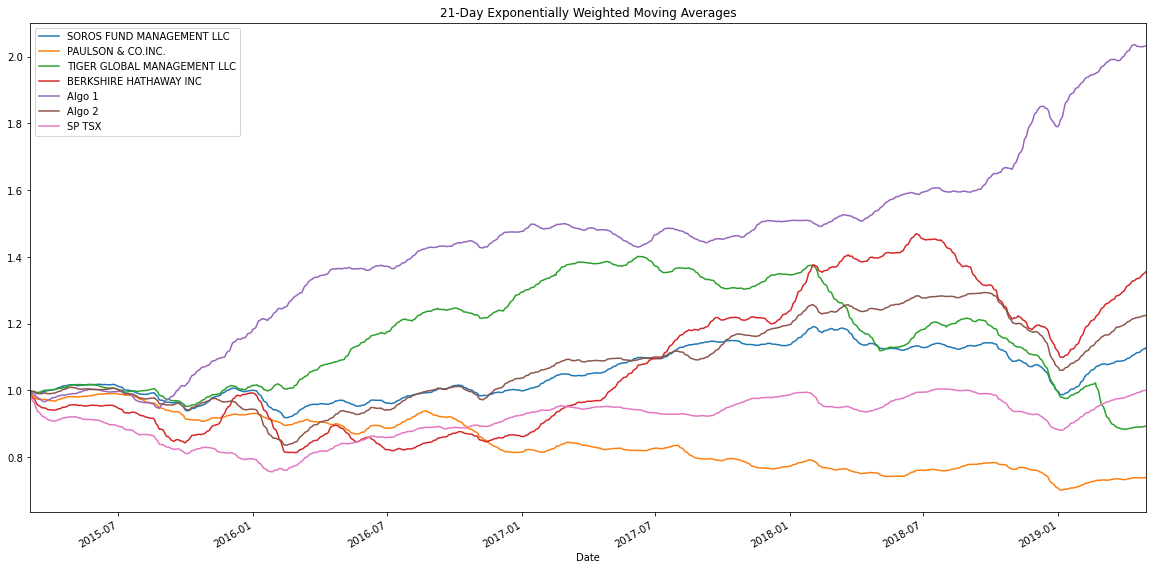

In [195]:
# Use `ewm` to calculate the rolling window
rolling_ewm = all_daily_returns.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponentially Weighted Moving Averages")
plt.margins(x=0)

The above graph shows that Algo 1, in average, reacts more abruptly to price changes than any other portfolio. Additionally, we see that Tiger Global Management followed the same path, however, in 2018 it dropped and below SP TSX showing a lot of volatility.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))

<AxesSubplot:>

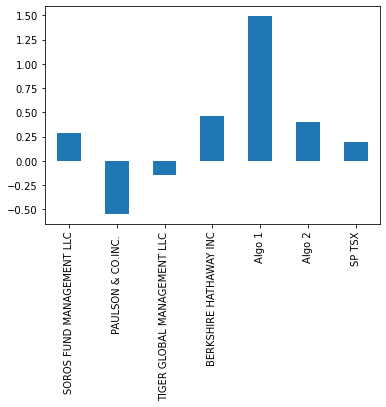

In [198]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

As per data shown on graph, Algorithm 1 outperformed all portfolios and the market altogether. Algorithm 2 and Berkshire Hathway had the same level of performance as per Sharpe Ratios calculation. Paulson and Tiger underperformed at the end, showing results below the standard for the market.

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [335]:
# Reading data from 1st stock
doll_csv = Path('../Resources/DOL.csv')
doll_df = pd.read_csv(doll_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
doll_df.columns=['DOLL']
doll_df.sort_index(inplace=True)
doll_df.tail()


,DOLL
Date,
2019-12-23,48.80
2019-12-24,48.76
2019-12-26,48.93
2019-12-27,49.08
2019-12-30,48.78


In [200]:
# Reading data from 2nd stock
lob_csv = Path('../Resources/L.csv')
lob_df = pd.read_csv(lob_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
lob_df.columns=['LOB']
lob_df.sort_index(inplace=True)
lob_df.tail()

,LOB
Date,
2019-12-23,51.40
2019-12-24,51.45
2019-12-26,51.94
2019-12-27,51.89
2019-12-30,52.01


In [201]:
# Reading data from 3rd stock
shop_csv = Path('../Resources/SHOP.csv')
shop_df = pd.read_csv(shop_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df.columns=['SHOP']
shop_df.sort_index(inplace=True)
shop_df.tail()

,SHOP
Date,
2019-12-23,389.13
2019-12-24,399.39
2019-12-26,408.75
2019-12-27,408.00
2019-12-30,396.36


In [202]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([doll_df, shop_df, lob_df], axis='columns', join='inner')
my_portfolio_df


,DOLL,SHOP,LOB
Date,,,
2015-05-21,51.63,25.68,41.05
2015-05-22,51.30,28.31,40.70
2015-05-26,50.33,29.65,40.05
2015-05-27,50.82,27.50,40.23
2015-05-28,50.58,27.45,40.33
...,...,...,...
2019-12-23,48.80,389.13,51.40
2019-12-24,48.76,399.39,51.45
2019-12-26,48.93,408.75,51.94


In [203]:
# Reset Date index
my_portfolio_df.sort_index(ascending=True, inplace=True)


In [205]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()

,DOLL,SHOP,LOB
Date,,,
2015-05-22,-0.006392,0.102414,-0.008526
2015-05-26,-0.018908,0.047333,-0.015971
2015-05-27,0.009736,-0.072513,0.004494
2015-05-28,-0.004723,-0.001818,0.002486
2015-05-29,-0.007711,-0.009107,-0.005207


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [207]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns_weighted = pd.DataFrame(my_portfolio_returns.dot(weights))
my_portfolio_returns_weighted.columns=['Weighted Returns']
my_portfolio_returns_weighted.dropna(inplace=True)

# Display sample data
my_portfolio_returns_weighted.head()

,Weighted Returns
Date,
2015-05-22,0.029166
2015-05-26,0.004151
2015-05-27,-0.019428
2015-05-28,-0.001352
2015-05-29,-0.007342


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [209]:
# Join your returns DataFrame to the original returns DataFrame
merged_portfolios_df = pd.concat([my_portfolio_returns_weighted, all_daily_returns], axis='columns', join='inner')
merged_portfolios_df.rename(columns = {'Weighted Returns':"DOLL/SHOP/LOB"}, inplace = True)
merged_portfolios_df.head()

,DOLL/SHOP/LOB,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,,
2015-05-22,0.029166,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187
2015-05-26,0.004151,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994
2015-05-27,-0.019428,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964
2015-05-28,-0.001352,-0.001599,0.000619,-0.001491,-0.008909,0.003087,0.001252,-0.000230
2015-05-29,-0.007342,-0.001533,0.000059,-0.004973,-0.005498,-0.001715,-0.005320,-0.006150


In [210]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
merged_portfolios_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [336]:
# Calculate the annualized `std`
annualized_std_df = pd.DataFrame((merged_portfolios_df.std()) * np.sqrt(252))
annualized_std_df.columns=['Annualized std']
annualized_std_df

,Annualized std
DOLL/SHOP/LOB,0.215956
SOROS FUND MANAGEMENT LLC,0.126379
PAULSON & CO.INC.,0.112863
TIGER GLOBAL MANAGEMENT LLC,0.176454
BERKSHIRE HATHAWAY INC,0.207968
Algo 1,0.121882
Algo 2,0.134209
SP TSX,0.112769


Per results in the annualized standard deviations, my portfolios are a lot riskier showing higher numbers. We also have to take into consideration that we are comparing three portfolios against the whole market, which will tend to be more volatile - using SP TSX as standard and safer benchmark. Tiger and Soros follows are markets with higher risk as per annualized std, which we were able to avaliate in earlier calculations. 

### Calculate and plot rolling `std` with 21-day window

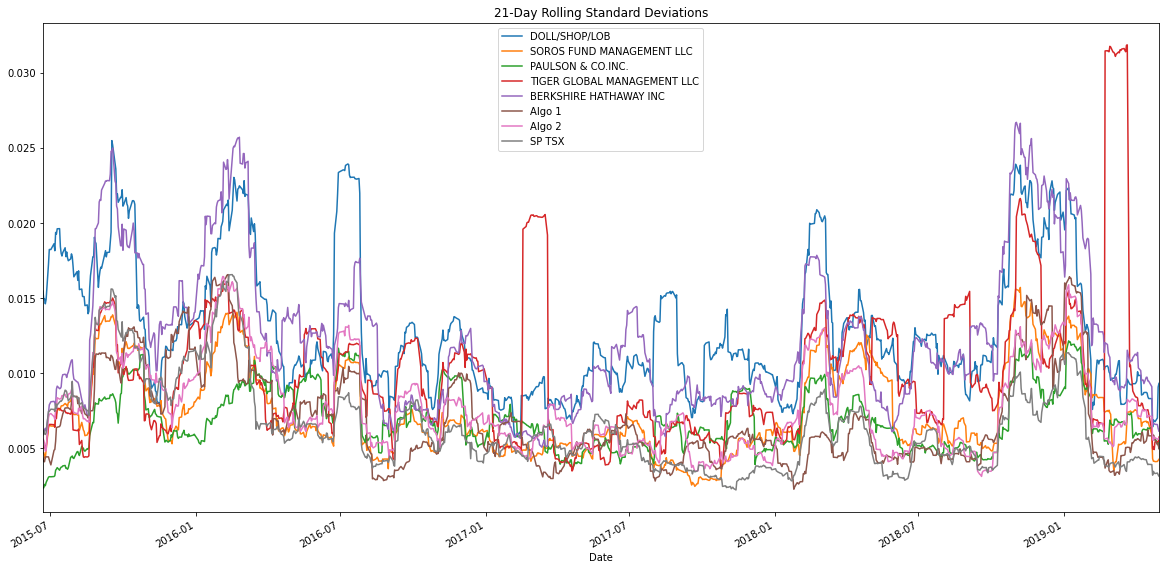

In [215]:
# Calculate rolling standard deviation
merged_portfolios_rolling_std = merged_portfolios_df.rolling(window=21).std()

# Plot rolling standard deviation
merged_portfolios_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)

As per previous  21 rolling calculation, the above graph indicates that all portfolios tend to see an increase in risk every time S&P TSX 60 has an increase in risk. My porftolio had above average increases in risk, following behind only BERKSHIRE HATHAWAY and TIGER GLOBAL MANAGEMENT. Paulson & Co seems to have followed the market for the most part, being slightly below market at times.

### Calculate and plot the correlation

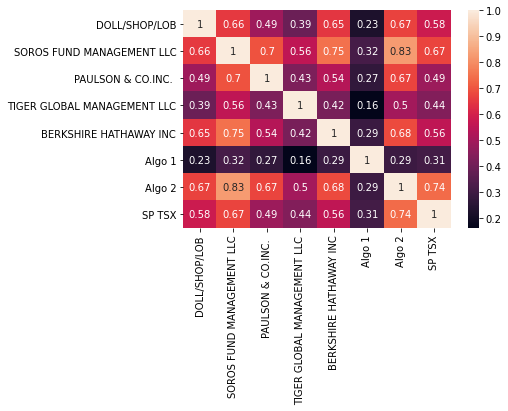

In [338]:
# Calculate and plot the correlation
correlation = merged_portfolios_df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

Based on the above correlation graph, Algo 2 is the portfolio that most correlates with the market. My portofolio had an above average correlation margin. Algo 1 is the one furthest from the market.

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

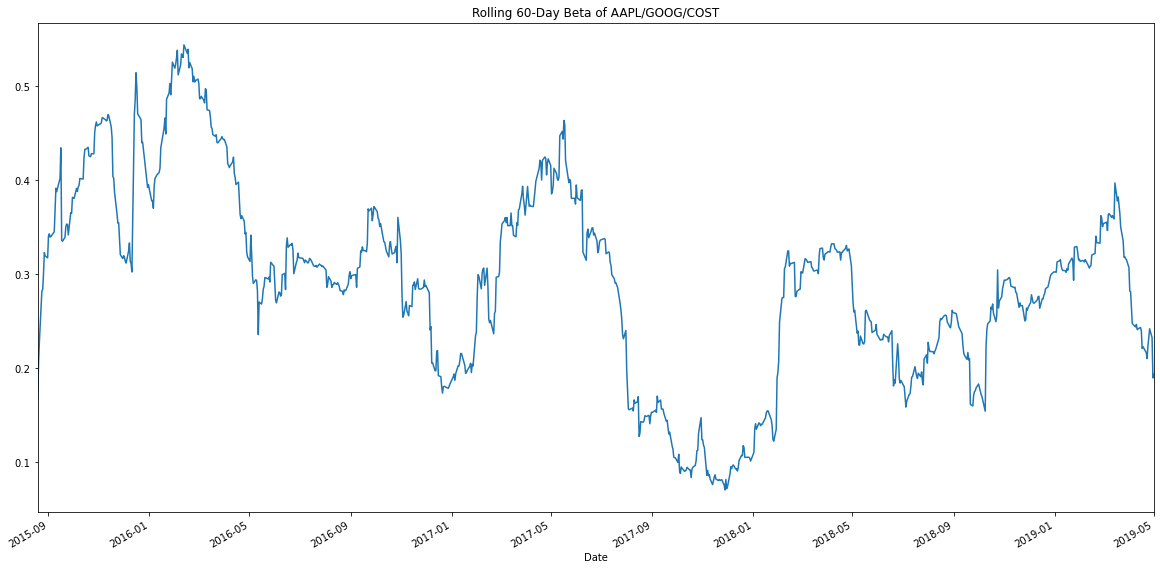

In [218]:
# Calculate and plot Beta
rolling_covariance = merged_portfolios_df['DOLL/SHOP/LOB'].rolling(window=60).cov(merged_portfolios_df['SP TSX'])
rolling_variance = merged_portfolios_df['DOLL/SHOP/LOB'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of AAPL/GOOG/COST')
plt.margins(x=0)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [219]:
# Calculate Annualzied Sharpe Ratios
my_portfolio_annualized_sharpe_ratios = merged_portfolios_df.mean() * 252 / (merged_portfolios_df.std() * np.sqrt(252))
my_portfolio_annualized_sharpe_ratios_sorted = my_portfolio_annualized_sharpe_ratios.sort_values(ascending=False)
my_portfolio_annualized_sharpe_ratios_sorted.dropna(inplace=True)


<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

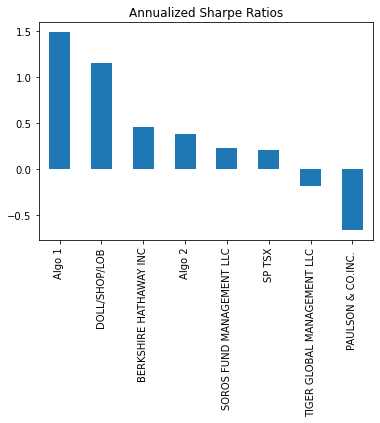

In [220]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_annualized_sharpe_ratios_sorted.plot(kind = "bar", title = "Annualized Sharpe Ratios")


According to the Annualized Sharpe Ratio calculation, Algo 1 outperformed the market, followed by my portfolio and Berkshire Hathaway. On the opposite side, Tiger Global and Paulson underperformed as compared to the market. 

### How does your portfolio do?

Write your answer here!

Per above analysis, the three portfolios I chose showed great volatility and high risk throughout the studied periods. Although this was expected when comparing three single portfolios against the market, it means that there is a lack of stability in their performance. On the other hand, the portfolios did outperform many, including management firms, and delivered good results. The analysis is clear, my portfolios are competitive and offer a safetynet for investors, being behind just the Algorithms. 